Datasets pulled from chembl nor not open access

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.molSize = (350,300)
import rdkit
print(rdkit.__version__)
%load_ext sql

2020.09.1


# Set 1
https://pubs.acs.org/doi/10.1021/jm300952s


In [6]:
d = %sql postgresql://localhost/chembl_26 \
select cids.chembl_id,canonical_smiles from compound_records \
  join compound_structures using (molregno)\
  join docs using (doc_id)\
  join chembl_id_lookup cids on (molregno=entity_id and entity_type='COMPOUND')\
  where doi='10.1021/jm300952s'  


35 rows affected.


35


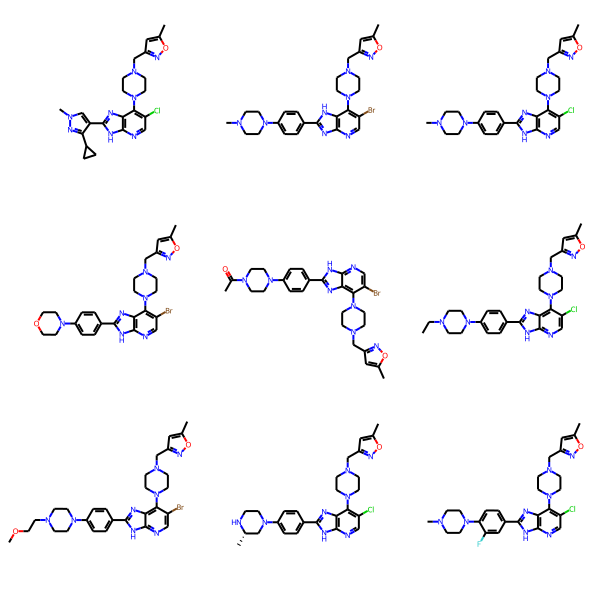

In [11]:
df = d.DataFrame()
ms = [x for x in [Chem.MolFromSmiles(smi) for smi in df['canonical_smiles']] if x is not None]
for m in ms:
    rdDepictor.Compute2DCoords(m)
print(len(ms))
Draw.MolsToGridImage(ms[:9],molsPerRow=3)

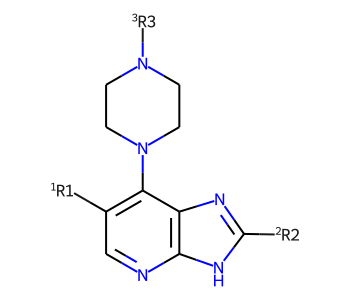

In [16]:
core = Chem.MolFromMolBlock('''
  Mrv2014 12192006492D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 18 20 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -6.4167 1.7067 0 0
M  V30 2 C -7.7503 0.9367 0 0
M  V30 3 C -7.7503 -0.6034 0 0
M  V30 4 N -6.4167 -1.3734 0 0
M  V30 5 C -5.083 -0.6034 0 0
M  V30 6 C -5.083 0.9367 0 0
M  V30 7 N -3.6103 1.387 0 0
M  V30 8 N -3.6538 -1.1044 0 0
M  V30 9 C -2.727 0.1255 0 0
M  V30 10 R# -1.1873 0.0986 0 0 RGROUPS=(1 2)
M  V30 11 R# -9.084 1.7067 0 0 RGROUPS=(1 1)
M  V30 12 N -6.4167 3.2467 0 0
M  V30 13 N -6.4167 6.3268 0 0
M  V30 14 C -7.7503 5.5568 0 0
M  V30 15 C -7.7503 4.0167 0 0
M  V30 16 C -5.083 4.0167 0 0
M  V30 17 C -5.083 5.5568 0 0
M  V30 18 R# -6.4167 7.8668 0 0 RGROUPS=(1 3)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 8 9
M  V30 8 1 7 6
M  V30 9 1 5 8
M  V30 10 2 7 9
M  V30 11 1 9 10
M  V30 12 1 2 11
M  V30 13 1 1 12
M  V30 14 1 13 14
M  V30 15 1 14 15
M  V30 16 1 16 17
M  V30 17 1 13 17
M  V30 18 1 15 12
M  V30 19 1 12 16
M  V30 20 1 13 18
M  V30 END BOND
M  V30 END CTAB
M  END
''')
core

In [17]:
len([x for x in ms if Chem.AddHs(x).HasSubstructMatch(core)])

34

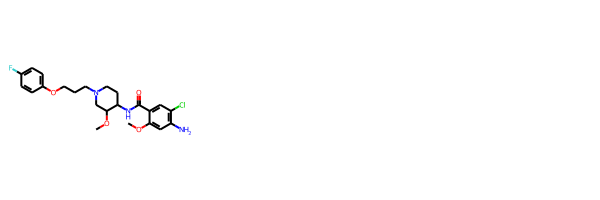

In [18]:
Draw.MolsToGridImage([x for x in ms if not Chem.AddHs(x).HasSubstructMatch(core)])

In [19]:
w = Chem.SDWriter('./data/jm300952s.sdf')
core.SetIntProp('scaffold',1)
w.write(core)
for m in ms:
    w.write(m)
w = None    

# Set 2
https://pubs.acs.org/doi/10.1021/acs.jmedchem.9b01499


70


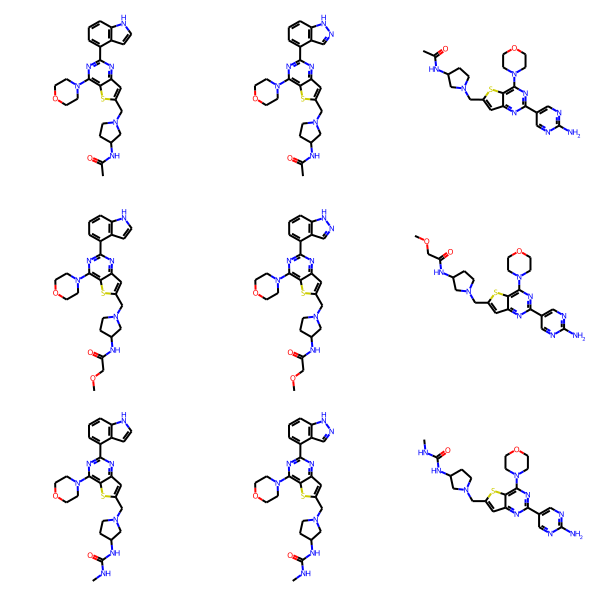

In [21]:
ms = [x for x in Chem.SmilesMolSupplier('./data/jm9b01499_si_003.csv',delimiter=',',smilesColumn=2,nameColumn=1) if x is not None]
for m in ms:
    rdDepictor.Compute2DCoords(m)
print(len(ms))
Draw.MolsToGridImage(ms[:9],molsPerRow=3)

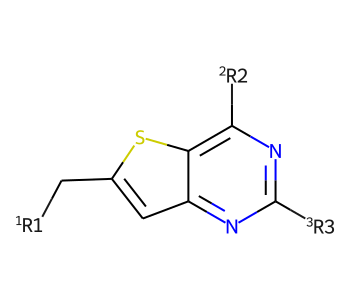

In [22]:
core = Chem.MolFromMolBlock('''
  Mrv2014 12192006562D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 14 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -1 4.9984 0 0
M  V30 2 C -2.3337 4.2284 0 0
M  V30 3 C -2.3337 2.6883 0 0
M  V30 4 N -1 1.9183 0 0
M  V30 5 C 0.3337 2.6883 0 0
M  V30 6 N 0.3337 4.2284 0 0
M  V30 7 S -3.814 4.6529 0 0
M  V30 8 C -4.6751 3.3761 0 0
M  V30 9 C -3.7271 2.1627 0 0
M  V30 10 C -6.2142 3.3224 0 0
M  V30 11 R# -6.9372 1.9626 0 0 RGROUPS=(1 1)
M  V30 12 R# -1 6.5384 0 0 RGROUPS=(1 2)
M  V30 13 R# 1.6674 1.9183 0 0 RGROUPS=(1 3)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 7 8
M  V30 8 1 7 2
M  V30 9 1 9 3
M  V30 10 2 8 9
M  V30 11 1 8 10
M  V30 12 1 10 11
M  V30 13 1 1 12
M  V30 14 1 5 13
M  V30 END BOND
M  V30 END CTAB
M  END
''')
core

In [23]:
len([x for x in ms if Chem.AddHs(x).HasSubstructMatch(core)])

70

In [24]:
Draw.MolsToGridImage([x for x in ms if not Chem.AddHs(x).HasSubstructMatch(core)])

In [25]:
w = Chem.SDWriter('./data/jm9b01499.sdf')
core.SetIntProp('scaffold',1)
w.write(core)
for m in ms:
    w.write(m)
w = None    

# Set 3
https://pubs.acs.org/doi/10.1021/jm3013163

In [26]:
d = %sql postgresql://localhost/chembl_26 \
select cids.chembl_id,canonical_smiles from compound_records \
  join compound_structures using (molregno)\
  join docs using (doc_id)\
  join chembl_id_lookup cids on (molregno=entity_id and entity_type='COMPOUND')\
  where doi='10.1021/jm3013163'  


43 rows affected.


43


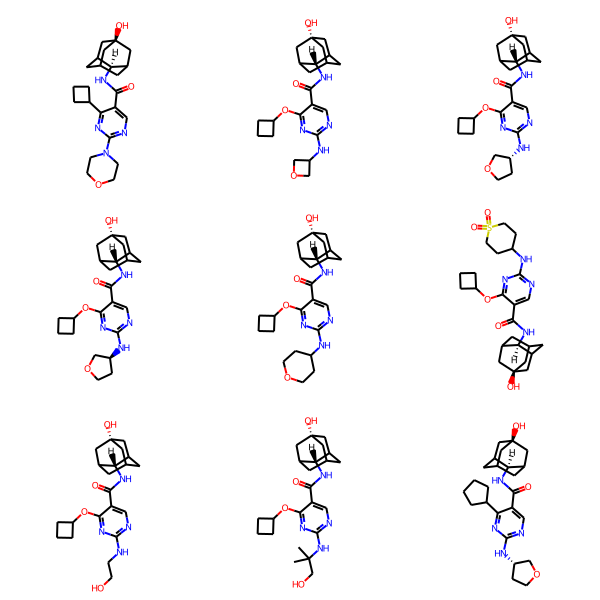

In [27]:
df = d.DataFrame()
ms = [x for x in [Chem.MolFromSmiles(smi) for smi in df['canonical_smiles']] if x is not None]
for m in ms:
    rdDepictor.Compute2DCoords(m)
print(len(ms))
Draw.MolsToGridImage(ms[:9],molsPerRow=3)

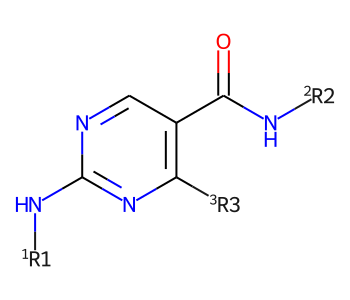

In [28]:
core = Chem.MolFromMolBlock('''
  Mrv2014 12192007022D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 13 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.7083 1.4984 0 0
M  V30 2 N -4.042 0.7284 0 0
M  V30 3 C -4.042 -0.8117 0 0
M  V30 4 N -2.7083 -1.5817 0 0
M  V30 5 C -1.3747 -0.8117 0 0
M  V30 6 C -1.3747 0.7284 0 0
M  V30 7 N -5.3757 -1.5817 0 0
M  V30 8 C -0.041 1.4983 0 0
M  V30 9 O -0.041 3.0383 0 0
M  V30 10 N 1.2927 0.7283 0 0
M  V30 11 R# -5.3757 -3.1217 0 0 RGROUPS=(1 1)
M  V30 12 R# 2.6264 1.4983 0 0 RGROUPS=(1 2)
M  V30 13 R# -0.041 -1.5817 0 0 RGROUPS=(1 3)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 3 7
M  V30 8 1 6 8
M  V30 9 2 8 9
M  V30 10 1 8 10
M  V30 11 1 7 11
M  V30 12 1 10 12
M  V30 13 1 5 13
M  V30 END BOND
M  V30 END CTAB
M  END
''')
core

In [29]:
len([x for x in ms if Chem.AddHs(x).HasSubstructMatch(core)])

43

In [30]:
Draw.MolsToGridImage([x for x in ms if not Chem.AddHs(x).HasSubstructMatch(core)])

In [31]:
w = Chem.SDWriter('./data/jm3013163.sdf')
core.SetIntProp('scaffold',1)
w.write(core)
for m in ms:
    w.write(m)
w = None

# Set 4
https://pubs.acs.org/doi/10.1021/jm201503u

In [32]:
d = %sql postgresql://localhost/chembl_26 \
select cids.chembl_id,canonical_smiles from compound_records \
  join compound_structures using (molregno)\
  join docs using (doc_id)\
  join chembl_id_lookup cids on (molregno=entity_id and entity_type='COMPOUND')\
  where doi='10.1021/jm201503u'  


28 rows affected.


28


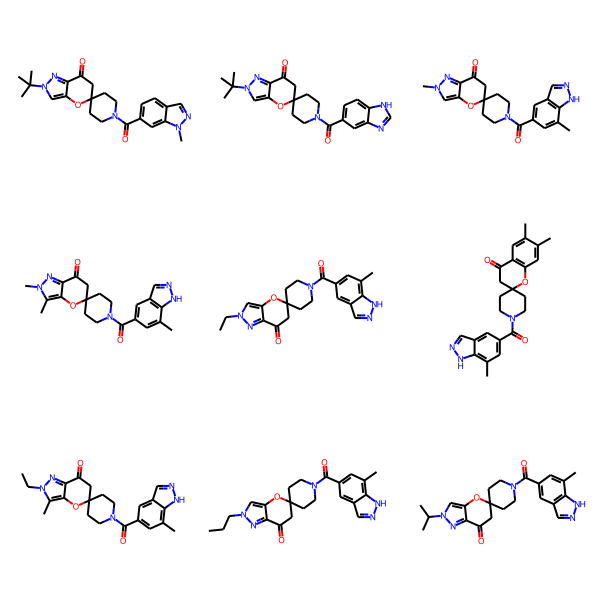

In [33]:
df = d.DataFrame()
ms = [x for x in [Chem.MolFromSmiles(smi) for smi in df['canonical_smiles']] if x is not None]
for m in ms:
    rdDepictor.Compute2DCoords(m)
print(len(ms))
Draw.MolsToGridImage(ms[:9],molsPerRow=3)

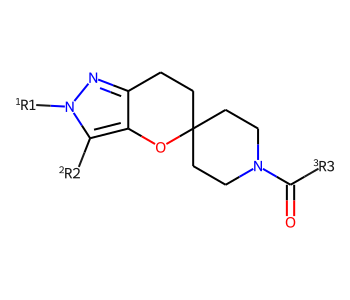

In [37]:
core = Chem.MolFromMolBlock('''
  Mrv2014 12192007082D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 19 21 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.875 6.04 0 0
M  V30 2 C -4.2087 5.27 0 0
M  V30 3 C -4.2087 3.73 0 0
M  V30 4 O -2.875 2.96 0 0
M  V30 5 C -1.5413 3.73 0 0
M  V30 6 C -1.5413 5.27 0 0
M  V30 7 C -0.2077 4.5 0 0
M  V30 8 C -1.5413 2.1899 0 0
M  V30 9 C -0.2077 1.4199 0 0
M  V30 10 N 1.126 2.1899 0 0
M  V30 11 C 1.126 3.73 0 0
M  V30 12 N -5.6464 5.8219 0 0
M  V30 13 N -6.6155 4.6251 0 0
M  V30 14 C -5.7768 3.3336 0 0
M  V30 15 C 2.4597 1.42 0 0
M  V30 16 R# 3.7934 2.19 0 0 RGROUPS=(1 3)
M  V30 17 O 2.4597 -0.12 0 0
M  V30 18 R# -8.1534 4.7057 0 0 RGROUPS=(1 1)
M  V30 19 R# -6.3389 1.8999 0 0 RGROUPS=(1 2)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 3 4
M  V30 4 1 4 5
M  V30 5 1 5 6
M  V30 6 1 1 6
M  V30 7 1 8 9
M  V30 8 1 9 10
M  V30 9 1 10 11
M  V30 10 1 7 11
M  V30 11 1 7 5
M  V30 12 1 5 8
M  V30 13 1 12 13
M  V30 14 1 13 14
M  V30 15 2 12 2
M  V30 16 2 14 3
M  V30 17 1 10 15
M  V30 18 2 15 17
M  V30 19 1 13 18
M  V30 20 1 14 19
M  V30 21 1 15 16
M  V30 END BOND
M  V30 END CTAB
M  END
''')
core

In [38]:
len([x for x in ms if Chem.AddHs(x).HasSubstructMatch(core)])

27

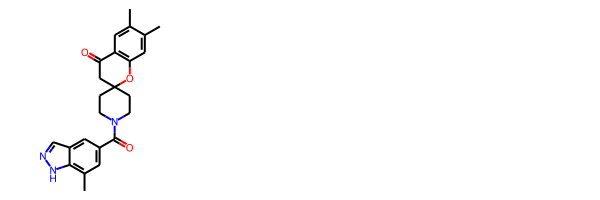

In [39]:
Draw.MolsToGridImage([x for x in ms if not Chem.AddHs(x).HasSubstructMatch(core)])

In [40]:
w = Chem.SDWriter('./data/jm201503u.sdf')
core.SetIntProp('scaffold',1)
w.write(core)
for m in ms:
    w.write(m)
w = None

# Set 5

In [41]:
d = %sql postgresql://localhost/chembl_26 \
select cids.chembl_id,canonical_smiles from compound_records \
  join compound_structures using (molregno)\
  join docs using (doc_id)\
  join chembl_id_lookup cids on (molregno=entity_id and entity_type='COMPOUND')\
  where doi='10.1021/jm200186n'  


33 rows affected.


33


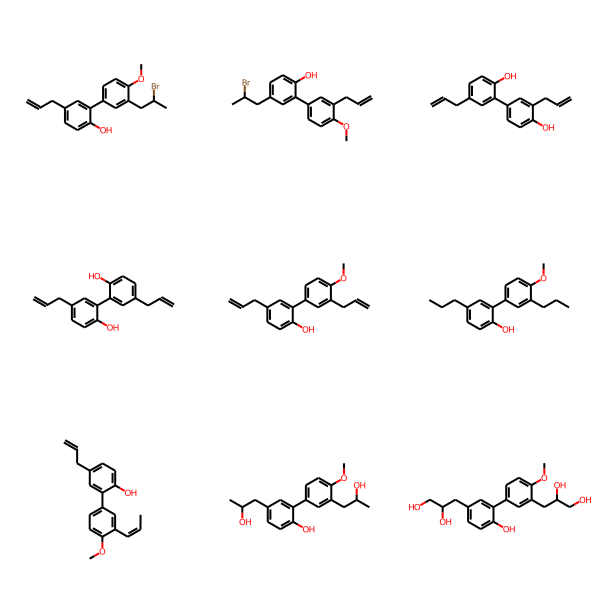

In [42]:
df = d.DataFrame()
ms = [x for x in [Chem.MolFromSmiles(smi) for smi in df['canonical_smiles']] if x is not None]
for m in ms:
    rdDepictor.Compute2DCoords(m)
print(len(ms))
Draw.MolsToGridImage(ms[:9],molsPerRow=3)

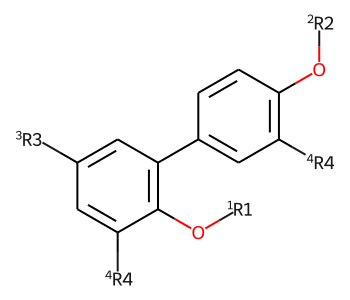

In [43]:
core = Chem.MolFromMolBlock('''
  Mrv2014 12192007142D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 19 20 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -4.5833 2.54 0 0
M  V30 2 C -5.917 1.77 0 0
M  V30 3 C -5.917 0.23 0 0
M  V30 4 C -4.5833 -0.54 0 0
M  V30 5 C -3.2497 0.23 0 0
M  V30 6 C -3.2497 1.77 0 0
M  V30 7 C -1.916 2.54 0 0
M  V30 8 C -0.5823 4.8501 0 0
M  V30 9 C -1.916 4.08 0 0
M  V30 10 C -0.5823 1.77 0 0
M  V30 11 C 0.7514 2.54 0 0
M  V30 12 C 0.7514 4.08 0 0
M  V30 13 O -1.916 -0.54 0 0
M  V30 14 R# -4.5833 -2.08 0 0 RGROUPS=(1 4)
M  V30 15 R# -7.2507 2.54 0 0 RGROUPS=(1 3)
M  V30 16 R# 2.085 1.77 0 0 RGROUPS=(1 4)
M  V30 17 O 2.085 4.85 0 0
M  V30 18 R# 2.0851 6.39 0 0 RGROUPS=(1 2)
M  V30 19 R# -0.5823 0.23 0 0 RGROUPS=(1 1)
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 6 7
M  V30 8 1 8 9
M  V30 9 2 10 11
M  V30 10 1 11 12
M  V30 11 2 8 12
M  V30 12 2 9 7
M  V30 13 1 7 10
M  V30 14 1 5 13
M  V30 15 1 4 14
M  V30 16 1 2 15
M  V30 17 1 11 16
M  V30 18 1 12 17
M  V30 19 1 17 18
M  V30 20 1 13 19
M  V30 END BOND
M  V30 END CTAB
M  END
''')
core


In [44]:
len([x for x in ms if Chem.AddHs(x).HasSubstructMatch(core)])

28

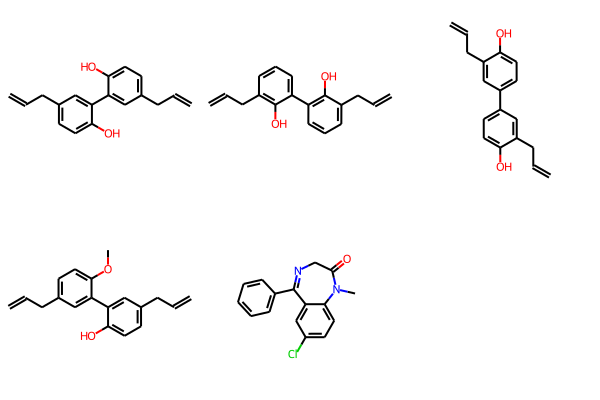

In [45]:
Draw.MolsToGridImage([x for x in ms if not Chem.AddHs(x).HasSubstructMatch(core)])

In [46]:
w = Chem.SDWriter('./data/jm200186n.sdf')
core.SetIntProp('scaffold',1)
w.write(core)
for m in ms:
    w.write(m)
w = None